### Nacachian Mauro -- 99619
## Comparacion de las probabilidades de error entre el rep analógico y digital

Usando las formulas calculadas para la probabilidad de error del repetidor analogico y digital, se grafican para poder compararlas. Las SNR van de -5 a 30 dB y las cantidades de etapas van de 1 a 25. 

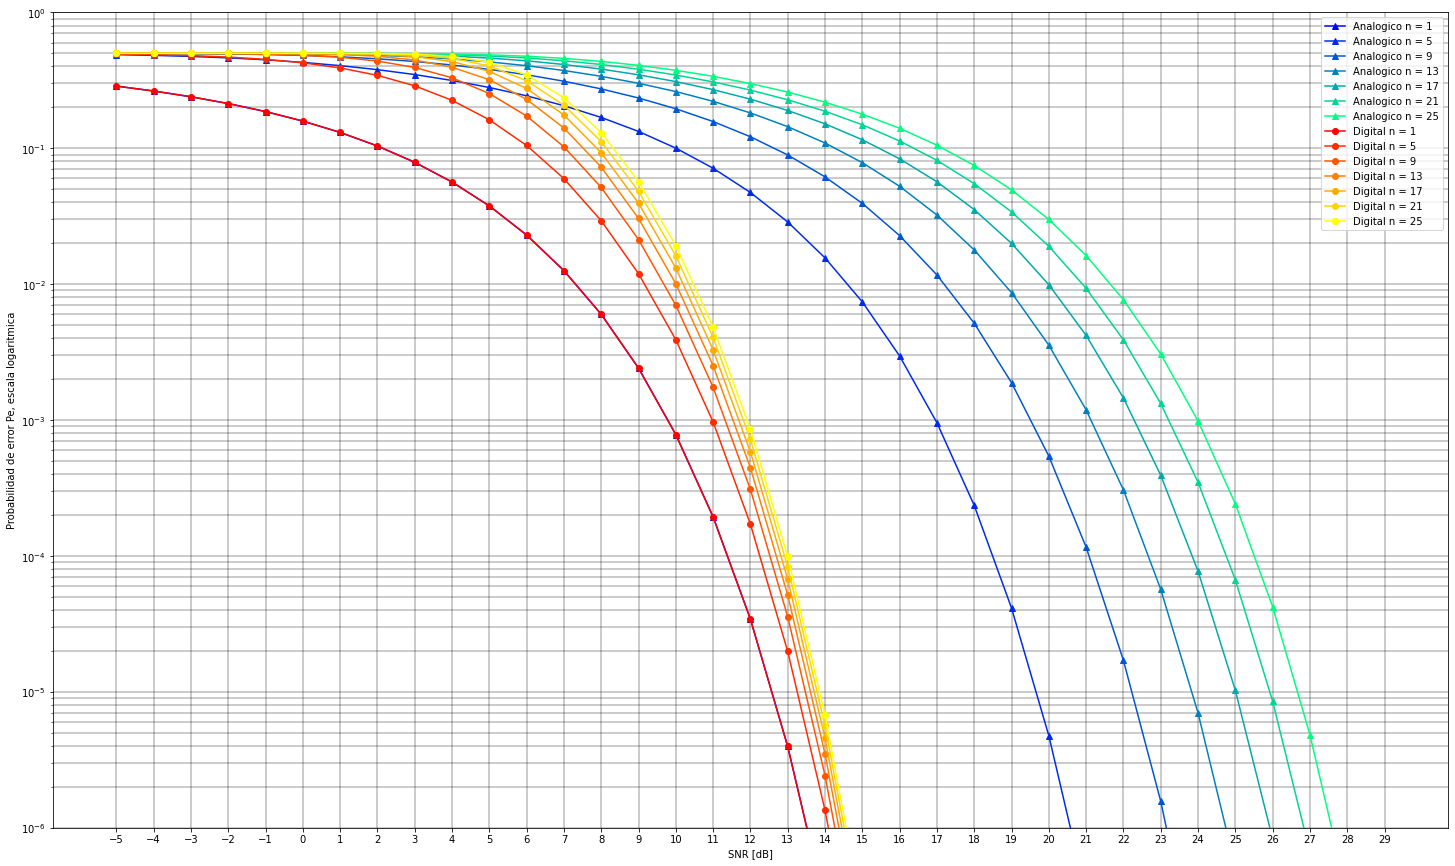

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def probErrorAnalog(snr,n):
    return stats.norm.sf(np.sqrt( 1 / (pow((snr+1) / snr,n) - 1) ))

def probErrorDigital(snr,n):
    return (1- pow((1 - 2 * stats.norm.sf( np.sqrt(snr) ) ), n) ) / 2

snr_db = np.arange(-5,30, 1, dtype = np.float)
snr = 10**(snr_db/10) 

n = np.arange(1,26,4) # Cantidad de repetidores, hasta 26 asi se incluye el 25!

plt.figure(figsize = (25,15))

# Mapa de colores para las curvas
#
colores_error_digital = iter( ( plt.get_cmap('autumn') )( np.linspace(0,1,len(n)) ) )
colores_error_analog = iter( ( plt.get_cmap('winter') )( np.linspace(0,1,len(n)) ) )

# Curvas de la prob. de error analogica
#
for i in n:
    plt.plot(snr_db, probErrorAnalog(snr,i), '-^' ,color = next(colores_error_analog), label = "Analogico n = {}".format(i), linewidth = 1.5)
    
# Curvas de la prob. de error digital
#
for i in n:
    plt.plot(snr_db, probErrorDigital(snr,i), '-o' ,color = next(colores_error_digital), label = "Digital n = {}".format(i), linewidth = 1.5 )

plt.xticks(snr_db)
plt.yscale('log')
plt.ylim(ymin = 10**-6)
plt.ylim(ymax = 10**0)
plt.grid(b = True, which = 'major', color = 'black', linestyle = '-', linewidth = 0.4)
plt.grid(b = True, which = 'minor', color = 'black', linestyle = '-', linewidth = 0.4)
plt.legend(loc = 'best')
plt.xlabel("SNR [dB]")
plt.ylabel("Probabilidad de error Pe, escala logaritmica")

# Guardo el grafico
#
plt.savefig("grafico_probabilidades.png")